# 1. Text Cleansing 데이터 정제 : 뉴스 text

## 1-a. 데이터 정제 계획
- 기사 text : 기사 끝에 "무단복제 금지" 나 기자의 이메일 등 본문 내용과 불필요한 정보가 담겨있다. 이 부분을 없앤다.

## 1-b. 파일 불러오기 : 뉴스 text 

In [17]:
import pandas as pd

df = pd.read_csv("1_news_금리.csv", encoding="utf-8")
df.head()

,search_keyword,created_date,created_time,media,title,text,url
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경...,https://n.news.naver.com/mnews/article/013/000...
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...,https://n.news.naver.com/mnews/article/001/000...
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...,https://n.news.naver.com/mnews/article/003/000...
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607899 entries, 0 to 1607898
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1602721 non-null  object
 1   created_date    1602721 non-null  object
 2   created_time    1602721 non-null  object
 3   media           1602721 non-null  object
 4   title           1602719 non-null  object
 5   text            1602721 non-null  object
 6   url             1602721 non-null  object
dtypes: object(7)
memory usage: 85.9+ MB


#### null값 제거

In [36]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602719 entries, 0 to 1607898
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1602719 non-null  object
 1   created_date    1602719 non-null  object
 2   created_time    1602719 non-null  object
 3   media           1602719 non-null  object
 4   title           1602719 non-null  object
 5   text            1602719 non-null  object
 6   url             1602719 non-null  object
dtypes: object(7)
memory usage: 97.8+ MB


In [9]:
# text 확인하기

for i in range(5):
    print(df.iloc(0)[i]["text"], end="\n\n")

강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판매한다.대출 대상은 사업기간이 3개월 이상으로 종업원 수 50인 미만인 소기업  소상공인을 대상으로 하며  부동산업  증기탕 등 일부 업종은 대상에서 제외된다.소상공인은 지역신용보증재단에 보증신청과 심사를 거쳐 특례보증에 의한 보증서를 발급받아야 하며  대출한도는 기업당 최고 1 000만원  대출기간은 5년 이내이고 대출금리는 기준금리 +1.0%이다.  황형주기자

(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은  9일  뉴욕채권시장에서 경기 위축 우려에 따른 연방준비제도이사회(FRB)의 금리인하정책 지속 전망으로  상승했다.오전 11시4분(뉴욕시간) 현재 10년만기 국채가격은 전날보다 12/32포인트 오른 99 27/32  수익률은 5bp 낮아진 연 3.51%를 나타냈다.2년만기 국채수익률은 8bp 떨어진 연 1.79%를 보였다.뉴욕 채권전문가들은 중앙은행이 경기 둔화에 대해 상당히 우려하는 것  같다면서 중앙은행이 금리인하정책을 지속할 수밖에 없는 상황이 조성되고 있다고 말했다.이들은 금리인하가 지속된다면 2년만기 국채 위주의 매수세가 지속될 것이며 경기 둔화 우려 역시 10년만기 국채에 대한 매력도를 높이게 될 것이라고 덧붙였다.여기에 스탠더드앤드푸어스(S&P)가 미 3대 모기지 보험업체들의 신용등급을  하향 조정한 것 역시 금융시장에 대한 우려를 부각시켰다고 이들은 전했다.S&P는 주택시장 침체가 내년까지 이어질 가능성이 높아 MGIC와 PMI그룹  레디언그룹 등 모기지 보험업체들의 신용등급을 낮춘다고 밝혔다.kisme@yna.co.kr(끝)<저작권자(c)연합인포맥스. 무단 전재-재배포 금지.>

(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경제정책들이  향후  빠르고 과감하게 추진될 전망이다.여당이 대부분의 상임위를 장악하면서 국회에 계류중인 경제.민생 관련  법안들을 속도있게 처리할 수 있을 것으로 보이며 정부는 국민들

## 1-c. 이메일을 기준으로 지우기
- "@" 뒤의 글자를 지운다.
- (가설 : "@"은 맨 뒤에만 있을 것이다.)
- 맨 뒤의 "." 이후의 문자를 지운다.

### 1-c-1. 테스트 데이터셋

In [24]:
# 테스트 데이터셋
test_df = df.head(20).copy()
test_df

,search_keyword,created_date,created_time,media,title,text,url
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경...,https://n.news.naver.com/mnews/article/013/000...
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...,https://n.news.naver.com/mnews/article/001/000...
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...,https://n.news.naver.com/mnews/article/003/000...
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...
5,금리,2008-04-10,00:42:00,연합인포맥스,"美달러, 경기 후퇴 우려로 하락",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 달러화는 9일 뉴욕환시에서 경기 후퇴와...,https://n.news.naver.com/mnews/article/013/000...
6,금리,2008-04-10,03:53:00,이데일리,"피셔 총재 ""주택시장 바닥 아니다""","- ""금리인하 가계·기업 자금조달비용 낮추지 못해""[뉴욕=이데일리 김기성특파원] ...",https://n.news.naver.com/mnews/article/018/000...
7,금리,2008-04-10,04:13:00,이데일리,달러 하락..`美 금리인하 지속된다`,[뉴욕=이데일리 김기성특파원] 9일(현지시간) 미국 외환시장에서 달러 가치가 유로와...,https://n.news.naver.com/mnews/article/018/000...
8,금리,2008-04-10,04:18:00,연합인포맥스,"FRB, 추가 금리인하에 반대 않는다[댈러스 연은 총재]",(서울=연합인포맥스) 유승기 기자= 리처드 피셔 댈러스 연방준비은행 총재는 연방준비...,https://n.news.naver.com/mnews/article/013/000...
9,금리,2008-04-10,04:21:00,서울신문,딜레마 빠진 통화정책 한은 ‘금리 묘수’ 뭘까,[서울신문]경기침체 우려에 따른 내수진작을 위해 기존의 통화정책 기조를 바꾸어야 할...,https://n.news.naver.com/mnews/article/081/000...


### 1-c-2. "@" 의 위치 찾기

In [26]:
def find_at_sign(text):
    index = text.find("@")
    # if index == -1:
    #     index = text.find("http")
    return index

test_df['at_position'] = test_df['text'].apply(find_at_sign)
test_df

,search_keyword,created_date,created_time,media,title,text,url,at_position
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...,-1
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경...,https://n.news.naver.com/mnews/article/013/000...,551
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...,https://n.news.naver.com/mnews/article/001/000...,2911
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...,https://n.news.naver.com/mnews/article/003/000...,1015
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...,-1
5,금리,2008-04-10,00:42:00,연합인포맥스,"美달러, 경기 후퇴 우려로 하락",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 달러화는 9일 뉴욕환시에서 경기 후퇴와...,https://n.news.naver.com/mnews/article/013/000...,550
6,금리,2008-04-10,03:53:00,이데일리,"피셔 총재 ""주택시장 바닥 아니다""","- ""금리인하 가계·기업 자금조달비용 낮추지 못해""[뉴욕=이데일리 김기성특파원] ...",https://n.news.naver.com/mnews/article/018/000...,524
7,금리,2008-04-10,04:13:00,이데일리,달러 하락..`美 금리인하 지속된다`,[뉴욕=이데일리 김기성특파원] 9일(현지시간) 미국 외환시장에서 달러 가치가 유로와...,https://n.news.naver.com/mnews/article/018/000...,643
8,금리,2008-04-10,04:18:00,연합인포맥스,"FRB, 추가 금리인하에 반대 않는다[댈러스 연은 총재]",(서울=연합인포맥스) 유승기 기자= 리처드 피셔 댈러스 연방준비은행 총재는 연방준비...,https://n.news.naver.com/mnews/article/013/000...,395
9,금리,2008-04-10,04:21:00,서울신문,딜레마 빠진 통화정책 한은 ‘금리 묘수’ 뭘까,[서울신문]경기침체 우려에 따른 내수진작을 위해 기존의 통화정책 기조를 바꾸어야 할...,https://n.news.naver.com/mnews/article/081/000...,1486


### 1-c-3. 실제 text 확인

In [28]:
for i in range(15, 20):
    print(test_df.iloc(0)[i]["text"], end="\n\n")

시중유동성 증가세가 꺾이지 않고 있다.2월에도 기업  가계 대출이 늘면서 유동성 증가세는 5년 1개월 만에 최고치를 기록했다. 최근 일부 지역을 중심으로 들썩이는 주택값이 늘어난 유동성과 결합할 경우 물가불안을 부추길 수 있다는 우려가 나오고 있다.9일 한국은행이 발표한 ‘2월중 통화 및 유동성 지표 동향’에 따르면 각종 통화·유동성 지표들은 지난달에 이어 또다시 5년여 만에 최고치를 기록했다.2년 미만의 정기예·적금 등을 포함한 광의통화(M2·평잔기준)는 지난해 같은 기간보다 13.4% 증가했다. 이러한 증가율은 전달 12.5%보다 0.9%포인트 상승한 수치다. 2003년 1월(13.9%)에 이어 가장 높은 수준이다.2년 이상의 정기예·적금 등을 포함한 금융기관 유동성(Lf) 증가율도 전달 11.4%에서 11.6%로 상승 폭이 확대됐다. 이에 따라 전체 광의유동성(L·말잔 기준) 증가율은 전월보다 0.2%포인트 상승한 13.2%를 기록해 2003년 1월(13.6%) 이후 가장 높은 증가율을 보였다.시중유동성이 이처럼 늘어난 이유는 기업 및 가계대출과 2년 미만의 정기예·적금이 큰 폭으로 증가했기 때문으로 한은은 분석했다. 2년 미만의 정기예·적금은 은행들이 수신 유치 경쟁을 벌이면서 전달 17조5000억원 증가한 데 이어 2월에도 8조3000억원이 늘어났다.여기에 요구불예금과 수시입출금식 예금 증가가 시중 유동성 증가의 배경이 됐다. 머니마켓펀드(MMF)는 기업들이 여유자금을 운용함에 따라 전달 6조8000억원에 이어 8조6000억원으로 증가 폭이 확대됐다.한은 관계자는 “유동성 증가는 장기적으로 물가상승을 자극할 수 있다”고 우려했다.한편 은행들의 수신경쟁에다 증시 조정을 거치면서 2월까지 급증했던 은행 수신은 3월들어 감소세로 전환했다.한은이 이날 발표한 ‘2008년 3월중 금융시장 동향’에 따르면 지난 달 은행수신은 전달보다 5조1000억원이 줄어 작년 12월 이후 3개월 만에 감소로 전환했다.은행 수신이 감소한 것은 3월중 국고채 만기 상환이 겹친 데

### 1-c-4. 원본 df에 테스트

In [32]:
# df 복사
df_copy = df.copy().dropna()
df_copy

,search_keyword,created_date,created_time,media,title,text,url
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경...,https://n.news.naver.com/mnews/article/013/000...
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...,https://n.news.naver.com/mnews/article/001/000...
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...,https://n.news.naver.com/mnews/article/003/000...
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...
...,...,...,...,...,...,...,...
1607894,금리,2023-10-19,23:36:04,머니투데이,8%대 모기지 금리에…美 주택매매 13년 만에 최저,미국의 9월 주택매매가 13년 만에 최저치로 하락했다. 8%를 넘나드는 모기지 금리...,https://n.news.naver.com/mnews/article/008/000...
1607895,금리,2023-10-19,23:39:44,연합뉴스,美 9월 기존주택 거래량 전월 대비 2%↓…2010년 이후 최저,"집값은 전년대비 2.8%↑…""매물 줄고 고금리에 구매력 저하""(뉴욕=연합뉴스) 이지...",https://n.news.naver.com/mnews/article/001/001...
1607896,금리,2023-10-19,23:40:47,아시아경제,"뉴욕증시, 파월 발언 대기하며 혼조세...넷플릭스 16% 급등",미국 뉴욕증시의 3대 지수는 19일(현지시간) 기업 실적 발표가 이어지는 가운데 이...,https://n.news.naver.com/mnews/article/277/000...
1607897,금리,2023-10-19,23:40:00,매일경제,“연 10% 적금? 주식 팔고 당장 가입”…2금융권 금리경쟁 ‘활활’,레고랜드發 예·적금 만기도래금융권 수신경쟁 격화새마을금고 10% 넘는 적금나와금융당...,https://n.news.naver.com/mnews/article/009/000...


In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602719 entries, 0 to 1607898
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1602719 non-null  object
 1   created_date    1602719 non-null  object
 2   created_time    1602719 non-null  object
 3   media           1602719 non-null  object
 4   title           1602719 non-null  object
 5   text            1602719 non-null  object
 6   url             1602719 non-null  object
dtypes: object(7)
memory usage: 97.8+ MB


In [34]:
df_copy['at_position'] = df_copy['text'].apply(find_at_sign)
df_copy

,search_keyword,created_date,created_time,media,title,text,url,at_position
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...,-1
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경...,https://n.news.naver.com/mnews/article/013/000...,551
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...,https://n.news.naver.com/mnews/article/001/000...,2911
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...,https://n.news.naver.com/mnews/article/003/000...,1015
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...,-1
...,...,...,...,...,...,...,...,...
1607894,금리,2023-10-19,23:36:04,머니투데이,8%대 모기지 금리에…美 주택매매 13년 만에 최저,미국의 9월 주택매매가 13년 만에 최저치로 하락했다. 8%를 넘나드는 모기지 금리...,https://n.news.naver.com/mnews/article/008/000...,-1
1607895,금리,2023-10-19,23:39:44,연합뉴스,美 9월 기존주택 거래량 전월 대비 2%↓…2010년 이후 최저,"집값은 전년대비 2.8%↑…""매물 줄고 고금리에 구매력 저하""(뉴욕=연합뉴스) 이지...",https://n.news.naver.com/mnews/article/001/001...,628
1607896,금리,2023-10-19,23:40:47,아시아경제,"뉴욕증시, 파월 발언 대기하며 혼조세...넷플릭스 16% 급등",미국 뉴욕증시의 3대 지수는 19일(현지시간) 기업 실적 발표가 이어지는 가운데 이...,https://n.news.naver.com/mnews/article/277/000...,-1
1607897,금리,2023-10-19,23:40:00,매일경제,“연 10% 적금? 주식 팔고 당장 가입”…2금융권 금리경쟁 ‘활활’,레고랜드發 예·적금 만기도래금융권 수신경쟁 격화새마을금고 10% 넘는 적금나와금융당...,https://n.news.naver.com/mnews/article/009/000...,-1


### 1-c-5. 시각화 : 1000 이하만

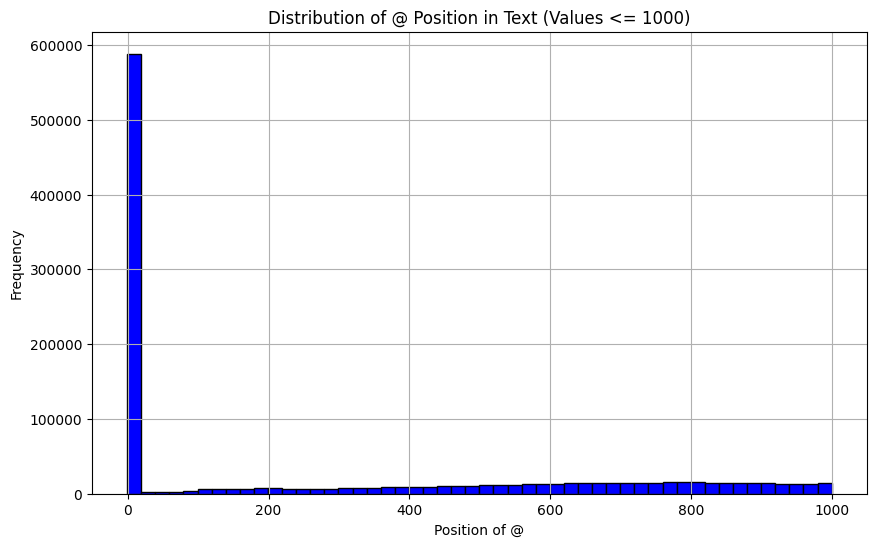

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# at_position 열의 값이 1000 이하인 데이터 필터링
filtered_df = df_copy[df_copy['at_position'] <= 1000]

# 필터링된 데이터의 at_position 열에 대한 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['at_position'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of @ Position in Text (Values <= 1000)')
plt.xlabel('Position of @')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 1-c-6. "-1" 값인 row만 df로 만들기

In [42]:
import pandas as pd

# at_position 열이 -1인 행만 필터링하여 새로운 DataFrame 생성
df_at_negative_one = filtered_df[filtered_df['at_position'] == -1]

# 결과 확인
df_at_negative_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586003 entries, 0 to 1607898
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   search_keyword  586003 non-null  object
 1   created_date    586003 non-null  object
 2   created_time    586003 non-null  object
 3   media           586003 non-null  object
 4   title           586003 non-null  object
 5   text            586003 non-null  object
 6   url             586003 non-null  object
 7   at_position     586003 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 40.2+ MB


### 1-c-7. text만 출력해보기

In [45]:
for i in range(20, 30):
    print(df_at_negative_one.iloc(0)[i]["text"], end="\n\n")

'08.4.10◆ 제한적 상승세 예상[전일동향]글로벌 증시 상승 영향으로 974원에 하락개장했던 달러/ 원 환율은 배당 역송금  수요와 역외의 매수로 장중 한때 976.60원까지 상승폭을 확대했다. 이날 발생한  하나금융지주와 외환은행 배달 관련 수요는 각각 1억달러  2억달러 수준인 것으로  알려졌다. 그러나 976원선 위에선 중공업체 등의 수출업체와 투신사의 헤지관련 매물이 유입되며 추가 상승하지 못하고 전일보다 1.20원 오른 976.10원에  거래를  마쳤다.총선 휴장일을 앞두고 소극적인 거래가 이루어진 것도 달러/ 원의 변동을 제한했다.(외국인주식거래: 거래소 603억 순매수  코스닥 56억 순매수)[금일전망]전날 발표된 3월 FOMC 의사록이 올 상반기 경제위축 우려를 밝힌 가운데  지난  2월 도매재고가 경기둔화에 따른 판매 부진으로 증가세를 보임에 따라 미국의 경기후퇴 우려가 증폭됐다. 또한 UPS의 실적 하향조정 등 기업실적에 대한 우려로 뉴욕증시가하락함에 따라 달러화가 엔화와 유로화에 약세를 보였다. 뉴욕환시에서 달러/ 엔은 전일보다 0.85엔 내린 101.80엔에  유로/ 엔은 0.13엔 내린 161.15엔에  유로/ 달러는 0.0119달러 오른 1.5831달러에 거래를 마쳤다.경기둔화 확산 우려에 따른 증시조정과 유가상승 부담 등으로 금일 달러/원 환율은 상승압력을 받으며 980원선을 시도할 가능성이 큰 것으로 전망된다. 지난밤  국제유가는 장중 사상 처음으로 112달러를 넘어섰다. 국제유가의 상승은 국내 무역수지의 악화와 함께 인플레이션 우려를 확산시킴에 따라 달러/ 원 환율에 상승재료로  작용할 것으로 생각된다. 다만 외국인의 주식순매수 관련 매물과 업체 네고로 980원선에서 상승세는 둔화될 것으로 보인다.금일 금통위를 앞두고 기준금리의 동결이 예상되는 가운데 한은 총재의 발언에 관심이 집중되고 있다. 최근 인플레이션 압력이 커지고 있으나  국내 경기 진작을 위한 향후 금리인하 가능성을 시사하는 발언이 나올 수 있기 때문이다. 한은 총

### 1-c-8. 시각화 결과 분석
- "-1" 값이 많았다 : 약 160만개 중 약 58만개정도
- 결론 : "@" 외에도 불필요한 정보를 거를 필터가 필요하다

### 1-c-9. 불필요한 text들
- 황형주기자
- 대한민국 희망언론! 경향신문  구독신청(http://smile.khan.co.kr) -ⓒ 경향신문 & 경향닷컴(www.khan.co.kr)  무단전재 및 재배포 금지〈경향닷컴은 한국온라인신문협회(www.kona.or.kr)의 디지털뉴스이용규칙에 따른 저작권을 행사합니다.〉
- < Copyright ⓒ mbn. 무단전재 및 재배포 금지 >
- [이근우 기자 / 임성현 기자][ⓒ 매일경제 & mk.co.kr  무단전재 및 재배포 금지][☞ 매일경제 구독] [주소창에 '경제'를 치면 매경 뉴스가 바로!]
- [워싱턴 = 윤경호 특파원 / 서울 = 조현정 기자][ⓒ 매일경제 & mk.co.kr  무단전재 및 재배포 금지][☞ 매일경제 구독] [주소창에 '경제'를 치면 매경 뉴스가 바로!]
- [이향휘 기자 / 오재현 기자][ⓒ 매일경제 & mk.co.kr  무단전재 및 재배포 금지][☞ 매일경제 구독] [주소창에 '경제'를 치면 매경 뉴스가 바로!]
- [임성현 기자][ⓒ 매일경제 & mk.co.kr  무단전재 및 재배포 금지][☞ 매일경제 구독] [주소창에 '경제'를 치면 매경 뉴스가 바로!]
- [임성현 기자][ⓒ 매일경제 & mk.co.kr  무단전재 및 재배포 금지][☞ 매일경제 구독] [주소창에 '경제'를 치면 매경 뉴스가 바로!]
- < Copyright ⓒ mbn. 무단전재 및 재배포 금지 >
- <저작권자(c)연합인포맥스. 무단 전재-재배포 금지.>
- < 모바일로 보는 디지털타임스 3553+NATE/magicⓝ/ez-i >< Copyrights ⓒ 디지털타임스 & dt.co.kr  무단 전재 및 재배포 금지 >
- ⓒ 한국경제신문  무단 전재 및 재배포 금지<한국온라인신문협회의 디지털뉴스이용규칙에 따른 저작권을 행사합니다>- (대한민국 중심언론 CBS  뉴스FM98.1 / 음악FM93.9 / TV CH 412)<저작권자 ⓒ CBS 노컷뉴스(www.nocutnews.co.kr) 무단전재 및 재배포 금지 >
- /오승범기자※ 저작권자 ⓒ 파이낸셜뉴스. 무단 전재-재배포 금지
- <엄지뉴스 - 휴대폰 메시지(문자·사진·동영상)를 보내주세요.  #5505>
- <손봉석 경향닷컴 기자>- 대한민국 희망언론! 경향신문  구독신청(http://smile.khan.co.kr) -ⓒ 경향신문 & 경향닷컴(www.khan.co.kr)  무단전재 및 재배포 금지〈경향닷컴은 한국온라인신문협회(www.kona.or.kr)의 디지털뉴스이용규칙에 따른 저작권을 행사합니다.〉


### 1-c-10. "@" 를 대신할 후보군 선정
- http
- ⓒ
- (c)

## 1-d. "@" 과 더불어, 새로운 기준 설정

### 1-d-1. find_at_sign 함수 변경

In [49]:
def find_at_sign(text):
    # "@"의 위치를 찾음
    position = text.find("@")
    if position != -1:
        return position

    # "http"의 위치를 찾음
    position = text.find("http")
    if position != -1:
        return position

    # "ⓒ"의 위치를 찾음
    position = text.find("ⓒ")
    if position != -1:
        return position

    # "(c)"의 위치를 찾음
    position = text.find("(c)")
    if position != -1:
        return position

    # 모든 검색이 실패하면 -1을 반환
    return -1

# 예제
text = "이것은 예제 텍스트입니다. 저작권 정보: ⓒ2024"
position = find_at_sign(text)
print(f"찾은 위치: {position}")
print(text[position:])

찾은 위치: 23
ⓒ2024


### 1-d-2. 업그레이드한 find_at_sign 함수 테스트

In [51]:
# df 복사
df_copy = df.copy().dropna()
df_copy

df_copy['at_position'] = df_copy['text'].apply(find_at_sign)
df_copy

,search_keyword,created_date,created_time,media,title,text,url,at_position
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...,-1
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경...,https://n.news.naver.com/mnews/article/013/000...,551
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...,https://n.news.naver.com/mnews/article/001/000...,2911
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...,https://n.news.naver.com/mnews/article/003/000...,1015
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...,990
...,...,...,...,...,...,...,...,...
1607894,금리,2023-10-19,23:36:04,머니투데이,8%대 모기지 금리에…美 주택매매 13년 만에 최저,미국의 9월 주택매매가 13년 만에 최저치로 하락했다. 8%를 넘나드는 모기지 금리...,https://n.news.naver.com/mnews/article/008/000...,-1
1607895,금리,2023-10-19,23:39:44,연합뉴스,美 9월 기존주택 거래량 전월 대비 2%↓…2010년 이후 최저,"집값은 전년대비 2.8%↑…""매물 줄고 고금리에 구매력 저하""(뉴욕=연합뉴스) 이지...",https://n.news.naver.com/mnews/article/001/001...,628
1607896,금리,2023-10-19,23:40:47,아시아경제,"뉴욕증시, 파월 발언 대기하며 혼조세...넷플릭스 16% 급등",미국 뉴욕증시의 3대 지수는 19일(현지시간) 기업 실적 발표가 이어지는 가운데 이...,https://n.news.naver.com/mnews/article/277/000...,-1
1607897,금리,2023-10-19,23:40:00,매일경제,“연 10% 적금? 주식 팔고 당장 가입”…2금융권 금리경쟁 ‘활활’,레고랜드發 예·적금 만기도래금융권 수신경쟁 격화새마을금고 10% 넘는 적금나와금융당...,https://n.news.naver.com/mnews/article/009/000...,-1


### 1-d-3. "-1" 인거만 df로 만들기 
- 결과 : 약 34만개로, 불필요한 데이터 약 24만개를 더 걸러낼 수 있다.

In [52]:
import pandas as pd

# at_position 열이 -1인 행만 필터링하여 새로운 DataFrame 생성
df_nega = df_copy[df_copy['at_position'] == -1]

# 결과 확인
df_nega.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345867 entries, 0 to 1607898
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   search_keyword  345867 non-null  object
 1   created_date    345867 non-null  object
 2   created_time    345867 non-null  object
 3   media           345867 non-null  object
 4   title           345867 non-null  object
 5   text            345867 non-null  object
 6   url             345867 non-null  object
 7   at_position     345867 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 23.7+ MB


### 1-d-4. 남은 것들 확인

In [54]:
for i in range(10, 20):
    print(df_nega.iloc(0)[i]["text"], end="\n\n")

[오마이뉴스 김종철 기자]경기 둔화에 대한 우려가 높아지고 있는 가운데  내수 경기를 떠받치는 소비와 투자 등의 증가세는 더욱 주춤하고 있다.대신 물가는 여전히 상승세를 이어가고 있다. 특히 서울 일부지역을 중심으로 부동산 값이 큰 폭으로 올랐다.이같은 사실은 한국은행이 10일 내놓은 '최근의 국내외 경제동향'에 따른 것이다. 보고서에 따르면  수출은 여전히 증가하고 있지만 소비와 투자 등의 증가세 둔화가 뚜렷해지고 있다.소비와 투자 감소  물가와 부동산만 뛰었다대신 물가는 여전히 큰폭의 상승세를 유지해 갔고  부동산 값 역시 상당히 높은 수준으로 올랐다. 특히 서울 강북지역을 중심으로 한 주택 매매가격 상승폭이 컸다.물가 상승의 주요한 원인은 수입 원자재 값 상승에 따른 공업제품 가격 인상과 각종 개인 서비스요금도 큰폭으로 올랐기 때문이다.또 고용 사정도 부진한 모습을 보였다. 지난 2월중 취업자수가 작년 같은 기간에 비해 21만명 증가하는데 그쳤다. 이는 작년 6월 31만명 증가한 이후 8개월 연속해 증가폭이 줄어들고 있는 것이다.한국은행은 "그동안의 경기상승세가 다소 주춤하고 있고  물가 높은 오름세를 지속하고 있다"면서 "소비와 투자 등 내수부문은 회복세가 둔화되고 있고  일부 경기지표들은 경기둔화 가능성을 보여주고 있다"고 밝혔다.금통위  8개월째 금리 동결한편  한국은행 금융통화위원회는 10일 4월 기준금리 운용 목표를 연 5.00% 그대로 유지하기로 했다. 한은의 금리동결은 작년 9월이후 8개월째다.금통위의 이번 결정은 최근 물가 여전히 높은 상승세를 보이고 있고  시중에 돈이 많이 풀려 있다는 점  서울 일부 지역을 중심으로 한 부동산값 상승 등을 고려한 것으로 보인다.하지만 소비와 투자 감소 등 경기 둔화 움직임이 커지고 있고  총선이후 정부와 여당의 경기부양을 위한 금리인하 요구도 더욱 거세질 것으로 보여 향후 한은의 행보가 주목된다.<엄지뉴스 - 휴대폰 메시지(문자·사진·동영상)를 보내주세요.  #5505>

오늘 주가는 이틀째 약세를 보이

### 1-d-5. 결론
- 이정도면 실제 df에 적용해도 되지 않을까 생각한다.

## 1-e. 원본 df에 적용하여 뒤에 붙은 불필요한 데이터 없애기

### 1-e-1. 원본 df 불러오기

In [2]:
import pandas as pd

df = pd.read_csv("1_news_금리.csv", encoding="utf-8")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607899 entries, 0 to 1607898
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1602721 non-null  object
 1   created_date    1602721 non-null  object
 2   created_time    1602721 non-null  object
 3   media           1602721 non-null  object
 4   title           1602719 non-null  object
 5   text            1602721 non-null  object
 6   url             1602721 non-null  object
dtypes: object(7)
memory usage: 85.9+ MB


#### null값 제거

In [3]:
df = df.copy().dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602719 entries, 0 to 1607898
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1602719 non-null  object
 1   created_date    1602719 non-null  object
 2   created_time    1602719 non-null  object
 3   media           1602719 non-null  object
 4   title           1602719 non-null  object
 5   text            1602719 non-null  object
 6   url             1602719 non-null  object
dtypes: object(7)
memory usage: 97.8+ MB


### 1-e-2.find_at_sign 함수 정의

In [4]:
def find_at_sign(text):
    # "@"의 위치를 찾음
    position = text.find("@")
    if position != -1:
        return position

    # "http"의 위치를 찾음
    position = text.find("http")
    if position != -1:
        return position

    # "ⓒ"의 위치를 찾음
    position = text.find("ⓒ")
    if position != -1:
        return position

    # "(c)"의 위치를 찾음
    position = text.find("(c)")
    if position != -1:
        return position

    # 모든 검색이 실패하면 -1을 반환
    return -1

# 예제
text = "이것은 예제 텍스트입니다. 저작권 정보: ⓒ2024"
position = find_at_sign(text)
print(f"찾은 위치: {position}")
print(text[position:])

찾은 위치: 23
ⓒ2024


### 1-e-3. find_at_sign를 df에 적용

In [5]:
df['special_char_index'] = df['text'].apply(find_at_sign)
df.head()

,search_keyword,created_date,created_time,media,title,text,url,special_char_index
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...,-1
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경...,https://n.news.naver.com/mnews/article/013/000...,551
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...,https://n.news.naver.com/mnews/article/001/000...,2911
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...,https://n.news.naver.com/mnews/article/003/000...,1015
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...,990


### 1-e-4. 작은 데이터셋으로 테스트

In [6]:
import pandas as pd

# special_char_index 이후의 텍스트를 제거하는 함수
def truncate_text(row):
    index = row['special_char_index']
    if index >= 0 and index < len(row['text']):
        return row['text'][:index]
    else:
        return row['text']

# 새로운 DataFrame 생성
df_truncated_sample = df.copy().head()
df_truncated_sample['text'] = df_truncated_sample.apply(truncate_text, axis=1)

# 결과 확인
print(df_truncated_sample)

  search_keyword created_date created_time   media                      title  \
0             금리   2008-04-10     00:03:00    강원일보   소상공인·소기업 대상 NH 뉴 스타트론 판매   
1             금리   2008-04-10     00:18:00  연합인포맥스      美 국채가, 경기 위축 우려 지속 상승   
2             금리   2008-04-10     00:19:28    연합뉴스         <여대야소..MB노믹스 속도낸다>   
3             금리   2008-04-10     00:22:00     뉴시스  <화제의 당선인>김영록, 행정가 출신의 대이변   
4             금리   2008-04-10     00:25:00    경향신문   [사설]우려되는 대통령의 ‘경기 부양’ 지시   

                                                text  \
0  강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...   
1  (뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은  9일  뉴욕채권시장에서 경...   
2  (서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...   
3  환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...   
4  역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...   

                                                 url  special_char_index  
0  https://n.news.naver.com/mnews/article/087/000...                  -1  
1  https://n.news.naver.co

#### 잘 적용된 모습을 확인할 수 있다.

In [7]:
for i in range(5):
    print(df_truncated_sample.iloc(0)[i]["text"], end="\n\n")

강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판매한다.대출 대상은 사업기간이 3개월 이상으로 종업원 수 50인 미만인 소기업  소상공인을 대상으로 하며  부동산업  증기탕 등 일부 업종은 대상에서 제외된다.소상공인은 지역신용보증재단에 보증신청과 심사를 거쳐 특례보증에 의한 보증서를 발급받아야 하며  대출한도는 기업당 최고 1 000만원  대출기간은 5년 이내이고 대출금리는 기준금리 +1.0%이다.  황형주기자

(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은  9일  뉴욕채권시장에서 경기 위축 우려에 따른 연방준비제도이사회(FRB)의 금리인하정책 지속 전망으로  상승했다.오전 11시4분(뉴욕시간) 현재 10년만기 국채가격은 전날보다 12/32포인트 오른 99 27/32  수익률은 5bp 낮아진 연 3.51%를 나타냈다.2년만기 국채수익률은 8bp 떨어진 연 1.79%를 보였다.뉴욕 채권전문가들은 중앙은행이 경기 둔화에 대해 상당히 우려하는 것  같다면서 중앙은행이 금리인하정책을 지속할 수밖에 없는 상황이 조성되고 있다고 말했다.이들은 금리인하가 지속된다면 2년만기 국채 위주의 매수세가 지속될 것이며 경기 둔화 우려 역시 10년만기 국채에 대한 매력도를 높이게 될 것이라고 덧붙였다.여기에 스탠더드앤드푸어스(S&P)가 미 3대 모기지 보험업체들의 신용등급을  하향 조정한 것 역시 금융시장에 대한 우려를 부각시켰다고 이들은 전했다.S&P는 주택시장 침체가 내년까지 이어질 가능성이 높아 MGIC와 PMI그룹  레디언그룹 등 모기지 보험업체들의 신용등급을 낮춘다고 밝혔다.kisme

(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경제정책들이  향후  빠르고 과감하게 추진될 전망이다.여당이 대부분의 상임위를 장악하면서 국회에 계류중인 경제.민생 관련  법안들을 속도있게 처리할 수 있을 것으로 보이며 정부는 국민들의 지지를 바탕으로  자신감있게 정책을 밀어붙일 수 있게 됐다.10일 기획재정

### 1-e-5. 마지막 "." 이후도 제거하기
- "@" 이후를 지우고 나면, 이메일 앞부분이 남는다. 그 부분도 제거한다.

#### truncate_text 함수 재정의

In [8]:
def truncate_text(row):
    # special_char_index 확인
    special_index = row['special_char_index']
    text = row['text']
    
    if special_index >= 0:
        # special_char_index 이전의 텍스트
        text = text[:special_index]

    # 마지막 "."의 위치를 찾음
    last_dot_index = text.rfind('.')
    if last_dot_index != -1:
        # 마지막 "." 이후의 텍스트를 제거
        return text[:last_dot_index + 1]
    else:
        # "."이 없는 경우, 현재 텍스트를 반환
        return text

# 새로운 DataFrame 생성
df_truncated_sample = df.copy().head()
df_truncated_sample['text'] = df_truncated_sample.apply(truncate_text, axis=1)

# 결과 확인
print(df_truncated_sample)

  search_keyword created_date created_time   media                      title  \
0             금리   2008-04-10     00:03:00    강원일보   소상공인·소기업 대상 NH 뉴 스타트론 판매   
1             금리   2008-04-10     00:18:00  연합인포맥스      美 국채가, 경기 위축 우려 지속 상승   
2             금리   2008-04-10     00:19:28    연합뉴스         <여대야소..MB노믹스 속도낸다>   
3             금리   2008-04-10     00:22:00     뉴시스  <화제의 당선인>김영록, 행정가 출신의 대이변   
4             금리   2008-04-10     00:25:00    경향신문   [사설]우려되는 대통령의 ‘경기 부양’ 지시   

                                                text  \
0  강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...   
1  (뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은  9일  뉴욕채권시장에서 경...   
2  (서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...   
3  환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...   
4  역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...   

                                                 url  special_char_index  
0  https://n.news.naver.com/mnews/article/087/000...                  -1  
1  https://n.news.naver.co

#### 의도대로 적용되었다.

In [9]:
for i in range(5):
    print(df_truncated_sample.iloc(0)[i]["text"], end="\n\n")

강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판매한다.대출 대상은 사업기간이 3개월 이상으로 종업원 수 50인 미만인 소기업  소상공인을 대상으로 하며  부동산업  증기탕 등 일부 업종은 대상에서 제외된다.소상공인은 지역신용보증재단에 보증신청과 심사를 거쳐 특례보증에 의한 보증서를 발급받아야 하며  대출한도는 기업당 최고 1 000만원  대출기간은 5년 이내이고 대출금리는 기준금리 +1.0%이다.

(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은  9일  뉴욕채권시장에서 경기 위축 우려에 따른 연방준비제도이사회(FRB)의 금리인하정책 지속 전망으로  상승했다.오전 11시4분(뉴욕시간) 현재 10년만기 국채가격은 전날보다 12/32포인트 오른 99 27/32  수익률은 5bp 낮아진 연 3.51%를 나타냈다.2년만기 국채수익률은 8bp 떨어진 연 1.79%를 보였다.뉴욕 채권전문가들은 중앙은행이 경기 둔화에 대해 상당히 우려하는 것  같다면서 중앙은행이 금리인하정책을 지속할 수밖에 없는 상황이 조성되고 있다고 말했다.이들은 금리인하가 지속된다면 2년만기 국채 위주의 매수세가 지속될 것이며 경기 둔화 우려 역시 10년만기 국채에 대한 매력도를 높이게 될 것이라고 덧붙였다.여기에 스탠더드앤드푸어스(S&P)가 미 3대 모기지 보험업체들의 신용등급을  하향 조정한 것 역시 금융시장에 대한 우려를 부각시켰다고 이들은 전했다.S&P는 주택시장 침체가 내년까지 이어질 가능성이 높아 MGIC와 PMI그룹  레디언그룹 등 모기지 보험업체들의 신용등급을 낮춘다고 밝혔다.

(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경제정책들이  향후  빠르고 과감하게 추진될 전망이다.여당이 대부분의 상임위를 장악하면서 국회에 계류중인 경제.민생 관련  법안들을 속도있게 처리할 수 있을 것으로 보이며 정부는 국민들의 지지를 바탕으로  자신감있게 정책을 밀어붙일 수 있게 됐다.10일 기획재정부와 국회 등에 따르면

### 1-e-6. truncate_text 를 df에 적용

In [14]:
df_truncated = df.copy()
df_truncated['text'] = df_truncated.apply(truncate_text, axis=1)

In [18]:
df_truncated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602719 entries, 0 to 1607898
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   search_keyword      1602719 non-null  object
 1   created_date        1602719 non-null  object
 2   created_time        1602719 non-null  object
 3   media               1602719 non-null  object
 4   title               1602719 non-null  object
 5   text                1602719 non-null  object
 6   url                 1602719 non-null  object
 7   special_char_index  1602719 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 110.0+ MB


### 1-e-7. 변경된 text 확인
- 깔끔하게 정제되었다.

In [15]:
for i in range(5):
    print(df_truncated.iloc(0)[i]["text"], end="\n\n")

강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판매한다.대출 대상은 사업기간이 3개월 이상으로 종업원 수 50인 미만인 소기업  소상공인을 대상으로 하며  부동산업  증기탕 등 일부 업종은 대상에서 제외된다.소상공인은 지역신용보증재단에 보증신청과 심사를 거쳐 특례보증에 의한 보증서를 발급받아야 하며  대출한도는 기업당 최고 1 000만원  대출기간은 5년 이내이고 대출금리는 기준금리 +1.0%이다.

(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은  9일  뉴욕채권시장에서 경기 위축 우려에 따른 연방준비제도이사회(FRB)의 금리인하정책 지속 전망으로  상승했다.오전 11시4분(뉴욕시간) 현재 10년만기 국채가격은 전날보다 12/32포인트 오른 99 27/32  수익률은 5bp 낮아진 연 3.51%를 나타냈다.2년만기 국채수익률은 8bp 떨어진 연 1.79%를 보였다.뉴욕 채권전문가들은 중앙은행이 경기 둔화에 대해 상당히 우려하는 것  같다면서 중앙은행이 금리인하정책을 지속할 수밖에 없는 상황이 조성되고 있다고 말했다.이들은 금리인하가 지속된다면 2년만기 국채 위주의 매수세가 지속될 것이며 경기 둔화 우려 역시 10년만기 국채에 대한 매력도를 높이게 될 것이라고 덧붙였다.여기에 스탠더드앤드푸어스(S&P)가 미 3대 모기지 보험업체들의 신용등급을  하향 조정한 것 역시 금융시장에 대한 우려를 부각시켰다고 이들은 전했다.S&P는 주택시장 침체가 내년까지 이어질 가능성이 높아 MGIC와 PMI그룹  레디언그룹 등 모기지 보험업체들의 신용등급을 낮춘다고 밝혔다.

(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경제정책들이  향후  빠르고 과감하게 추진될 전망이다.여당이 대부분의 상임위를 장악하면서 국회에 계류중인 경제.민생 관련  법안들을 속도있게 처리할 수 있을 것으로 보이며 정부는 국민들의 지지를 바탕으로  자신감있게 정책을 밀어붙일 수 있게 됐다.10일 기획재정부와 국회 등에 따르면

## 1-f. 본문에 포함된 언론사 명 없애기
- ex) "연합인포맥스", "뉴시스" 이런게 기사 초반부에 들어가있는데, 이걸 전부 없앨 것이다.

### 1-f-1. (1-e)를 거친 df 가져오기

In [16]:
df_truncated.head()

,search_keyword,created_date,created_time,media,title,text,url,special_char_index
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...,-1
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=연합인포맥스) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경...,https://n.news.naver.com/mnews/article/013/000...,551
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=연합뉴스) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정...,https://n.news.naver.com/mnews/article/001/000...,2911
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인【광주=뉴시스】전남도 행정부지사 출신 무소속 ...,https://n.news.naver.com/mnews/article/003/000...,1015
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...,990


### 1-f-2. media 리스트 만들기

In [17]:
media_list = df_truncated['media'].unique().tolist()

# 결과 출력
print(media_list)

['강원일보', '연합인포맥스', '연합뉴스', '뉴시스', '경향신문', '이데일리', '서울신문', '파이낸셜뉴스', '아시아경제', 'MBN', 'YTN', '매일경제', '한국경제', '머니투데이', '디지털타임스', '한국경제TV', '노컷뉴스', '프레시안', 'SBS(text)', 'SBS', '헤럴드POP', '아이뉴스24', '오마이뉴스', '디지털데일리', '매일신문', '부산일보', 'MBC', '내일신문', '문화일보', '헤럴드경제', '쿠키뉴스', '서울경제', '국민일보', '한겨레', '세계일보', '동아일보', '전자신문', '매경이코노미', '조세일보', '한경비즈니스', '주간경향', '데일리안', '신동아', '미디어오늘', '미래통합당', '주간동아', '제주일보', '한겨레21', '스포츠조선', '레이디경향', '정책브리핑', '지디넷코리아', '스포츠경향', '마이데일리', '더불어민주당', '청와대', 'OSEN', '일다', 'EPA연합뉴스', '시사IN', '기자협회보', '블로터', '조이뉴스24', '여성신문', 'TV리포트', '엑스포츠뉴스', '스포탈코리아', '중앙SUNDAY', '국회', '코리아헤럴드', 'SBS Biz', 'SBS CNBC ', '뉴스1', '조선비즈', '스포츠동아', '스포츠월드', '머니S', 'KBS', '연합뉴스TV', '정의당', 'JTBC', 'SBS연예뉴스', '채널A', 'TV조선', '헬스조선', '한국일보', '스타뉴스', '아이즈 ize', '인벤', '스포츠서울', '포모스', '데일리e스포츠', '텐아시아', '코메디닷컴', '씨네21', '민생당', '바른정당', '조선일보', '시사저널', '우리공화당', '민주평화당', '바스켓코리아', '스포츠춘추', '주간조선', '월간 산', 'KBS 연예', '중앙일보', 'MK스포츠 ', '뉴스타파', '더팩트', 'MBC연예', '동아사이언스', '뉴스엔', '일간스포츠', '코리아중앙데일리', '비즈워치',

### 1-f-3. 테스트 : media 이름 지우기
- 잘 적용된다.

In [21]:
df_test = df_truncated.head().copy()

def remove_first_media_name(row, media_list):
    for word in media_list:
        if word in row:
            # 원소를 찾았으면 제거하고, 업데이트된 텍스트 반환
            return row.replace(word, "", 1)
    # filtered_list의 어떤 원소도 없다면 원래 텍스트 반환
    return row

# 'text' 칼럼 업데이트
df_test['text'] = df_test['text'].apply(lambda row: remove_first_media_name(row, media_list))

# 결과 출력
print(df_test)

  search_keyword created_date created_time   media                      title  \
0             금리   2008-04-10     00:03:00    강원일보   소상공인·소기업 대상 NH 뉴 스타트론 판매   
1             금리   2008-04-10     00:18:00  연합인포맥스      美 국채가, 경기 위축 우려 지속 상승   
2             금리   2008-04-10     00:19:28    연합뉴스         <여대야소..MB노믹스 속도낸다>   
3             금리   2008-04-10     00:22:00     뉴시스  <화제의 당선인>김영록, 행정가 출신의 대이변   
4             금리   2008-04-10     00:25:00    경향신문   [사설]우려되는 대통령의 ‘경기 부양’ 지시   

                                                text  \
0  강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...   
1  (뉴욕=) 김홍규 특파원 = 미국 국채가격은  9일  뉴욕채권시장에서 경기 위축 우...   
2  (서울=) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경...   
3  환호하는 김영록 해남.완도.진도 당선인【광주=】전남도 행정부지사 출신 무소속 김영록...   
4  역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...   

                                                 url  special_char_index  
0  https://n.news.naver.com/mnews/article/087/000...                  -1  
1  https://n.news.naver.co

### 1-f-4. 실제 df에 적용하기 : media 이름 지우기

In [22]:
# 'text' 칼럼 업데이트
df_truncated['text'] = df_truncated['text'].apply(lambda row: remove_first_media_name(row, media_list))

# 결과 출력
print(df_truncated)

        search_keyword created_date created_time   media  \
0                   금리   2008-04-10     00:03:00    강원일보   
1                   금리   2008-04-10     00:18:00  연합인포맥스   
2                   금리   2008-04-10     00:19:28    연합뉴스   
3                   금리   2008-04-10     00:22:00     뉴시스   
4                   금리   2008-04-10     00:25:00    경향신문   
...                ...          ...          ...     ...   
1607894             금리   2023-10-19     23:36:04   머니투데이   
1607895             금리   2023-10-19     23:39:44    연합뉴스   
1607896             금리   2023-10-19     23:40:47   아시아경제   
1607897             금리   2023-10-19     23:40:00    매일경제   
1607898             금리   2023-10-19     23:52:01    동아일보   

                                           title  \
0                       소상공인·소기업 대상 NH 뉴 스타트론 판매   
1                          美 국채가, 경기 위축 우려 지속 상승   
2                             <여대야소..MB노믹스 속도낸다>   
3                      <화제의 당선인>김영록, 행정가 출신의 대이변   
4                  

In [25]:
df_truncated.head(3)

,search_keyword,created_date,created_time,media,title,text,url,special_char_index
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...,-1
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경기 위축 우...,https://n.news.naver.com/mnews/article/013/000...,551
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경...,https://n.news.naver.com/mnews/article/001/000...,2911


### 1-f-5. 불필요한 칼럼 지우기

In [26]:
df_result = df_truncated.drop("special_char_index", axis=1).copy()
df_result.head(3)

,search_keyword,created_date,created_time,media,title,text,url
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경기 위축 우...,https://n.news.naver.com/mnews/article/013/000...
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경...,https://n.news.naver.com/mnews/article/001/000...


### 1-f-6. 파일로 저장

In [27]:
file_path = "1_cleansed_news.csv"
df_result.to_csv(file_path, index=False, encoding="utf-8")